In [27]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import csv

%matplotlib notebook

death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
country_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
country_df = country_df[['Country_Region', 'Last_Update', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active']]
death_df.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2025,2030,2047,2067,2082,2096,2117,2126,2139,2149
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1055,1066,1074,1088,1098,1111,1117,1125,1134,1143
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2640,2647,2659,2666,2675,2687,2696,2705,2716,2722
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,79,80,80,81,81,82,82,83,83,83
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,382,384,386,387,390,393,393,393,396,399


In [28]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,49378,49621,49681,49817,50013,50190,50433,50655,50810,50886
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,51424,52004,52542,53003,53425,53814,54317,54827,55380,55755
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,93933,94371,94781,95203,95659,96069,96549,97007,97441,97857
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7466,7519,7560,7577,7602,7633,7669,7699,7756,7806
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16484,16562,16626,16644,16686,16802,16931,17029,17099,17149


In [29]:
country_df.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,Afghanistan,2020-12-27 16:22:25,33.93911,67.709953,51039.0,2160.0,41096.0,7783.0
1,Albania,2020-12-27 16:22:25,41.15330,20.168300,56254.0,1153.0,31565.0,23536.0
2,Algeria,2020-12-27 16:22:25,28.03390,1.659600,97857.0,2722.0,65505.0,29630.0
3,Andorra,2020-12-27 16:22:25,42.50630,1.521800,7806.0,83.0,7252.0,471.0
4,Angola,2020-12-27 16:22:25,-11.20270,17.873900,17149.0,399.0,9976.0,6774.0


<IPython.core.display.Javascript object>


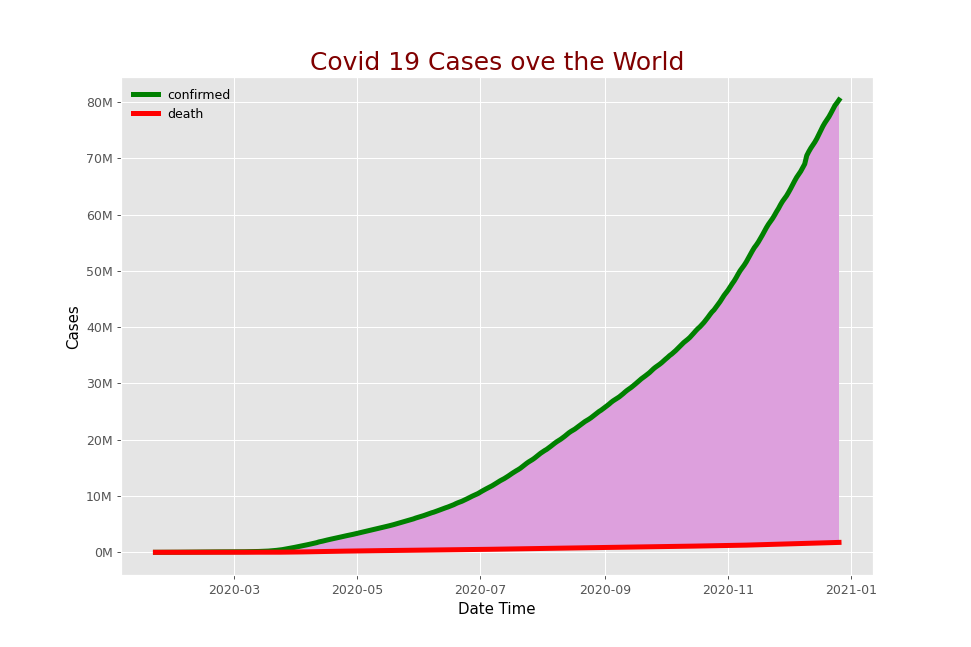

In [30]:
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')

labels = ['confirmed', 'death'] 
df_list = [confirmed_df, death_df]
colors = ['green', 'red']

plt.figure(figsize = (12, 8)) 

x_data = pd.to_datetime(np.array(list(confirmed_df.iloc[:, 4:].columns)))
for i, df in enumerate(df_list):
    y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
    plt.plot(x_data, y_data, color = colors[i], linewidth = 4)
ax = plt.gca()
ax.set_xlabel('Date Time', c = 'black' )
ax.set_ylabel('Cases', c = 'black')

def millions(x, pos):
    return '%1.0fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

ax.fill_between(x_data, np.sum(np.asarray(death_df.iloc[:,4:]),axis = 0), np.sum(np.asarray(confirmed_df.iloc[:,4:]),axis = 0), facecolor='plum')

oservation_date = np.arange(x_data[0], x_data[-1], dtype = 'datetime64[D]')

plt.title('Covid 19 Cases over the World', fontsize = 20, c = 'maroon')
plt.legend(labels, frameon = False)
plt.show()


In [31]:
sort_Confirmed_df = country_df.sort_values('Confirmed', ascending = False)
sort_Confirmed_df = sort_Confirmed_df.head(10)
sort_Confirmed_df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
177,US,2020-12-27 16:22:25,40.000000,-100.000000,19000572.0,332145.0,NaN,18668338.0
79,India,2020-12-27 16:22:25,20.593684,78.962880,10187850.0,147622.0,9761538.0,278690.0
23,Brazil,2020-12-27 16:22:25,-14.235000,-51.925300,7465806.0,190795.0,6654189.0,620822.0
141,Russia,2020-12-27 16:22:25,61.524000,105.318800,3019972.0,54080.0,2426094.0,539798.0
62,France,2020-12-27 16:22:25,46.227600,2.213700,2608277.0,62694.0,195638.0,2349356.0
181,United Kingdom,2020-12-27 16:22:25,55.000000,-3.000000,2262735.0,70513.0,4910.0,2187312.0
176,Turkey,2020-12-27 16:22:25,38.963700,35.243300,2147578.0,19878.0,2015230.0,112470.0
85,Italy,2020-12-27 16:22:25,41.871900,12.567400,2038783.0,71627.0,1386213.0,580943.0
161,Spain,2020-12-27 16:22:25,40.463667,-3.749220,1854951.0,49824.0,150376.0,1654751.0
66,Germany,2020-12-27 16:22:25,51.165691,10.451526,1657382.0,30005.0,1255361.0,372016.0


<IPython.core.display.Javascript object>


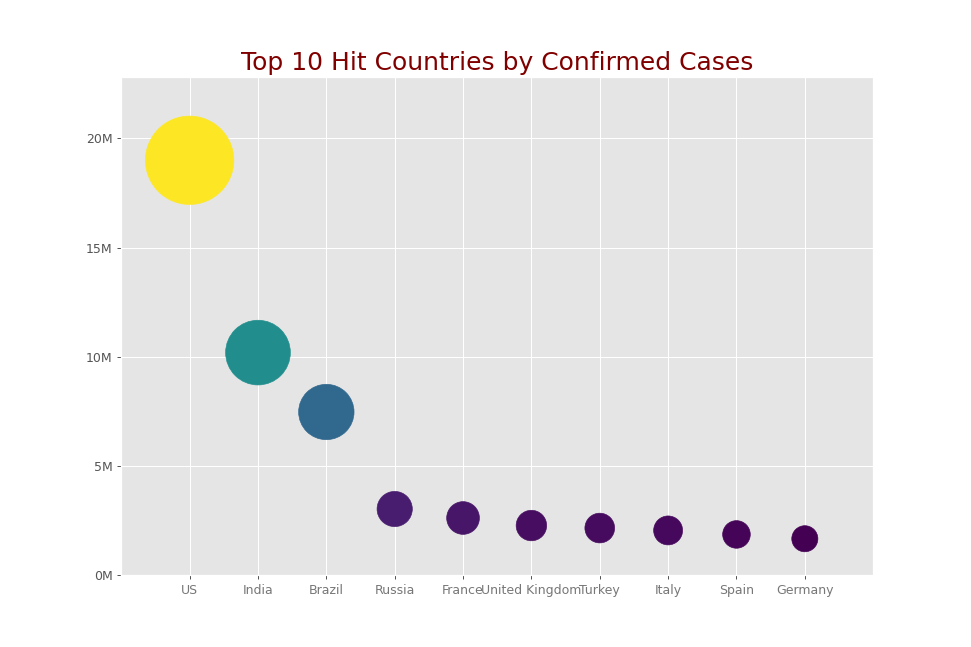

In [32]:
x_range = np.arange(10)

plt.figure(figsize = (12, 8))
ax = plt.gca()

xmax = sort_Confirmed_df.iloc[0, 4]
scatter = ax.scatter(x_range, sort_Confirmed_df['Confirmed'], c=sort_Confirmed_df['Confirmed'], s=sort_Confirmed_df['Confirmed']/(xmax/5000))

def millions(x, pos):
    return '%1.0fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
ax.axis([-1, 10, 0, xmax+xmax/5])
plt.xticks(np.arange(10), sort_Confirmed_df['Country_Region'], alpha=0.8)
plt.title('Top 10 Hit Countries by Confirmed Cases', fontsize = 20, c = 'maroon')
plt.show()

In [33]:
sort_Death_df = country_df.sort_values('Deaths', ascending = False)
sort_Death_df = sort_Death_df.head(10)
sort_Death_df

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active
177,US,2020-12-27 16:22:25,40.000000,-100.000000,19000572.0,332145.0,NaN,18668338.0
23,Brazil,2020-12-27 16:22:25,-14.235000,-51.925300,7465806.0,190795.0,6654189.0,620822.0
79,India,2020-12-27 16:22:25,20.593684,78.962880,10187850.0,147622.0,9761538.0,278690.0
114,Mexico,2020-12-27 16:22:25,23.634500,-102.552800,1377217.0,122026.0,1031864.0,223327.0
85,Italy,2020-12-27 16:22:25,41.871900,12.567400,2038783.0,71627.0,1386213.0,580943.0
181,United Kingdom,2020-12-27 16:22:25,55.000000,-3.000000,2262735.0,70513.0,4910.0,2187312.0
62,France,2020-12-27 16:22:25,46.227600,2.213700,2608277.0,62694.0,195638.0,2349356.0
81,Iran,2020-12-27 16:22:25,32.427908,53.688046,1200465.0,54693.0,951860.0,193912.0
141,Russia,2020-12-27 16:22:25,61.524000,105.318800,3019972.0,54080.0,2426094.0,539798.0
161,Spain,2020-12-27 16:22:25,40.463667,-3.749220,1854951.0,49824.0,150376.0,1654751.0


<IPython.core.display.Javascript object>


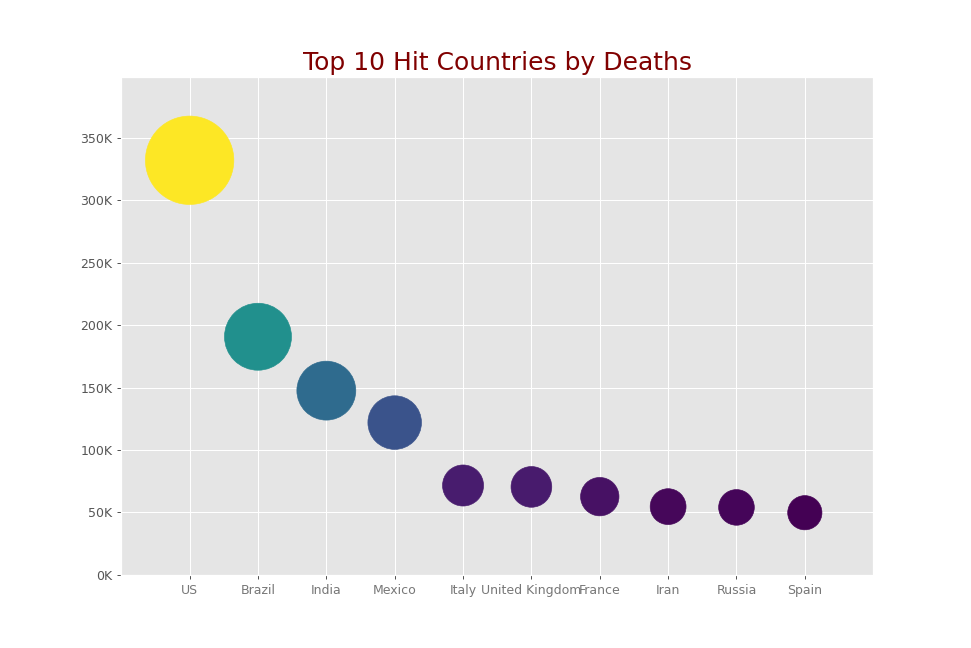

In [34]:
x_range = np.arange(10)

plt.figure(figsize = (12, 8))
ax = plt.gca()

xmax = sort_Death_df.iloc[0, 5]
scatter = ax.scatter(x_range, sort_Death_df['Deaths'], c=sort_Death_df['Deaths'], s=sort_Death_df['Deaths']/(xmax/5000))

def millions(x, pos):
    return '%1.0fK' % (x * 1e-3)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)
ax.axis([-1, 10, 0, xmax+xmax/5])
plt.xticks(np.arange(10), sort_Death_df['Country_Region'], alpha=0.8)
plt.title('Top 10 Hit Countries by Deaths', fontsize = 20, c = 'maroon')
plt.show()

In [35]:
country_df = country_df.replace('US', 'United States')
country_df = country_df.replace('Burma', 'Myanmar')
country_df = country_df.replace('Cabo Verde', 'Cape Verde')
country_df = country_df.replace('Congo (Brazzaville)', 'Republic of the Congo')
country_df = country_df.replace('Congo (Kinshasa)', 'Democratic Republic of the Congo')
country_df = country_df.replace("Cote d'Ivoire", 'Ivory Coast')
country_df = country_df.replace('Czechia', 'Czech Republic')
country_df = country_df.replace('Eswatini', 'Swaziland')
country_df = country_df.replace('Holy See', 'Vatican')
country_df = country_df.replace('Korea, South', 'South Korea')
country_df = country_df.replace('North Macedonia', 'Macedonia')
country_df = country_df.replace('Timor-Leste', 'East Timor')

country_df['Country_Region'] =  country_df['Country_Region'].str.replace("*","")

url = 'https://countrycode.org/'
tables = pd.read_html(url)
table = tables[0][['COUNTRY', 'COUNTRY CODE', 'ISO CODES']]
merge_table = pd.merge(country_df, table, how = 'left', left_on = 'Country_Region', right_on = 'COUNTRY')
merge_table['iso_codes'] = ''
for i in range(len(merge_table)):
    x = str(merge_table.iloc[i][10])
    merge_table.iloc[i, 11] = x[5:]
merge_table.head()

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,COUNTRY,COUNTRY CODE,ISO CODES,iso_codes
0,Afghanistan,2020-12-27 16:22:25,33.93911,67.709953,51039.0,2160.0,41096.0,7783.0,Afghanistan,93,AF / AFG,AFG
1,Albania,2020-12-27 16:22:25,41.15330,20.168300,56254.0,1153.0,31565.0,23536.0,Albania,355,AL / ALB,ALB
2,Algeria,2020-12-27 16:22:25,28.03390,1.659600,97857.0,2722.0,65505.0,29630.0,Algeria,213,DZ / DZA,DZA
3,Andorra,2020-12-27 16:22:25,42.50630,1.521800,7806.0,83.0,7252.0,471.0,Andorra,376,AD / AND,AND
4,Angola,2020-12-27 16:22:25,-11.20270,17.873900,17149.0,399.0,9976.0,6774.0,Angola,244,AO / AGO,AGO


<IPython.core.display.Javascript object>


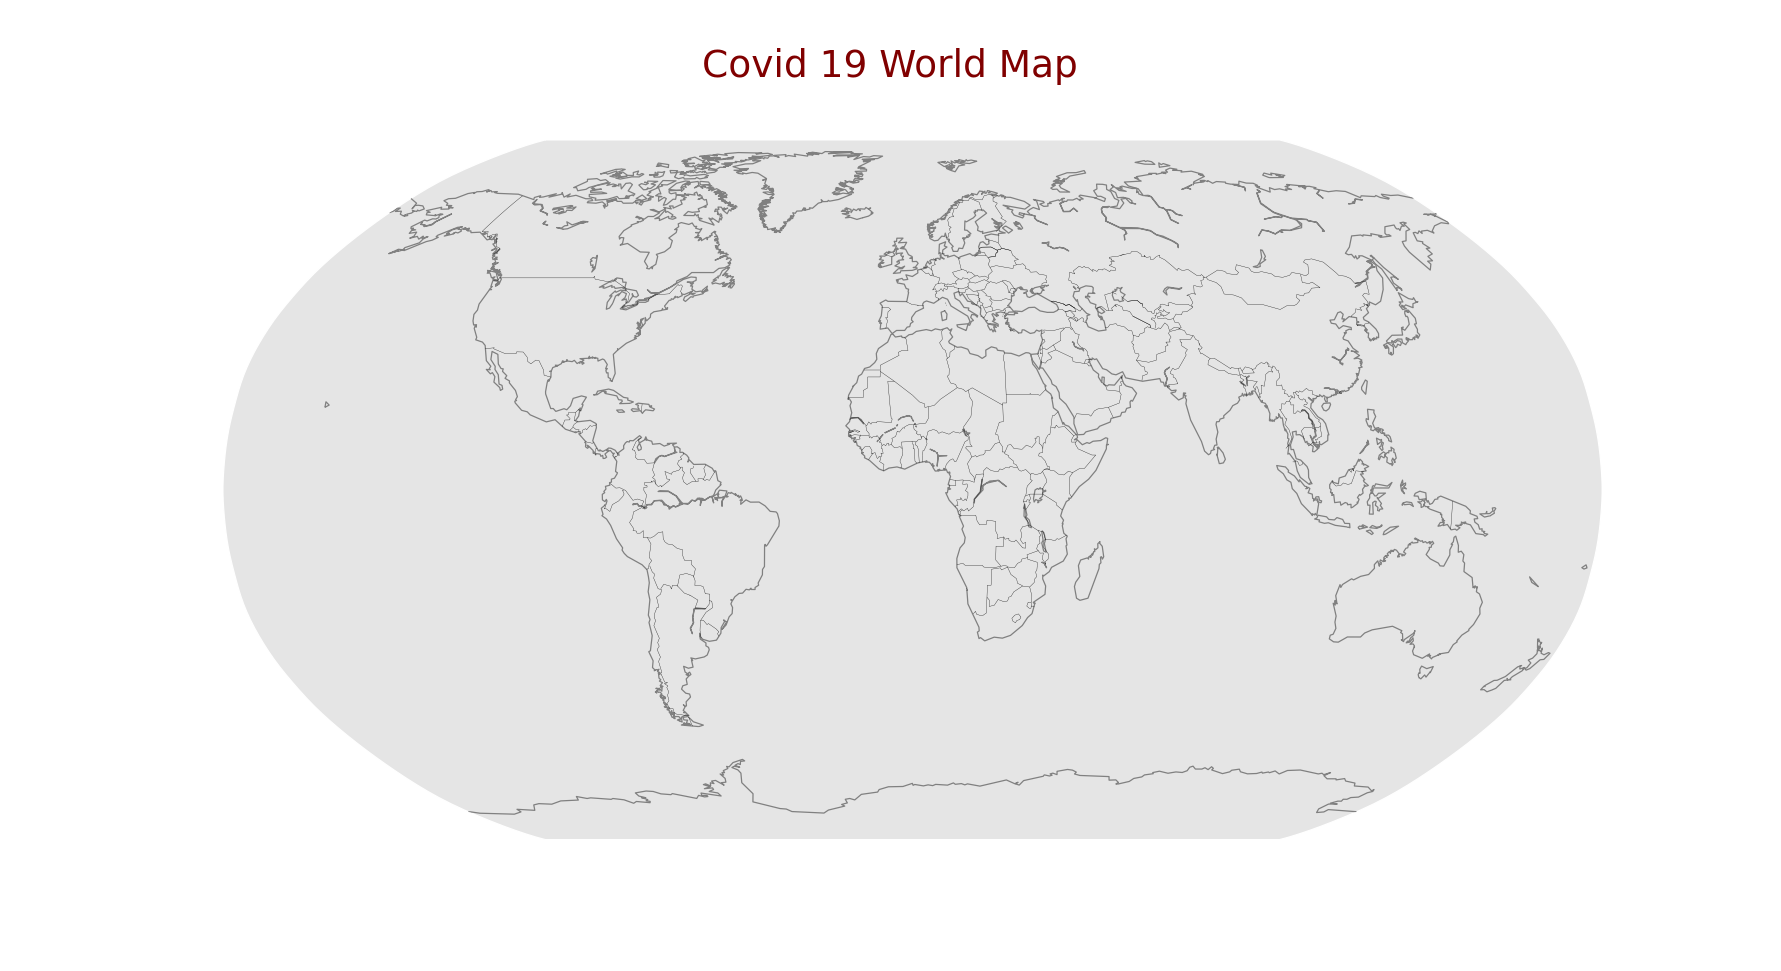

In [36]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111, frame_on=False)
fig.suptitle('Covid 19 World Map', fontsize=30, y=.95, c = 'maroon')

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')
m.drawcoastlines(color = 'grey')
m.drawcountries(linewidth=0.25)


<IPython.core.display.Javascript object>


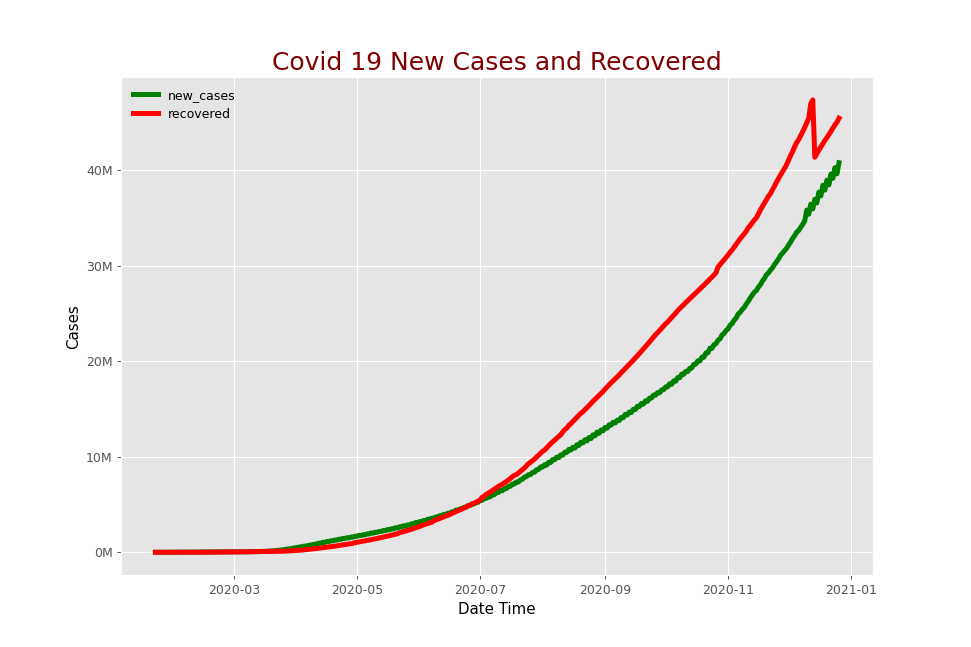

In [42]:
new_cases_df = confirmed_df
columns = new_cases_df.columns
new_cases_df = new_cases_df[columns]
for i in range(4, len(columns)-1):
    new_cases_df[columns[i+1]] = new_cases_df[columns[i+1]] - new_cases_df[columns[i]]

labels = ['new_cases', 'recovered'] 
df_list = [new_cases_df, recovered_df]
colors = ['green', 'red']

plt.figure(figsize = (12, 8)) 

x_data = pd.to_datetime(np.array(list(new_cases_df.iloc[:, 4:].columns)))
for i, df in enumerate(df_list):
    y_data = np.sum(np.asarray(df.iloc[:,4:]),axis = 0)
    plt.plot(x_data, y_data, color = colors[i], linewidth = 4)
ax = plt.gca()
ax.set_xlabel('Date Time', c = 'black' )
ax.set_ylabel('Cases', c = 'black')

def millions(x, pos):
    return '%1.0fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

plt.title('Covid 19 New Cases and Recovered', fontsize = 20, c = 'maroon')
plt.legend(labels, frameon = False)
plt.show()